In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/DataSlush/Talent Profiles - talent_samples.csv")

In [3]:
df.head()

,First Name,Last Name,Profile Description,Gender,City,Country,Job Types,Skills,Software,Content Verticals,Creative Styles,Platforms,Past Creators,Monthly Rate,Hourly Rate,# of Views by Creators
0,Sarah,Moore,"Hello! Sarah, the Podcast Editor from Seattle,...",Female,Seattle,United States,"Podcast Editor, Social Media Manager, Finance","Reconciliation, Scheduling posts, Project mana...","Slack, Quickbooks, Xero, TaxWise, Wave, Adobe ...","Food & Cooking, Automotive & Cars, IRL, Kids &...",NaN,"Facebook, TikTok, Apple, Twitter, Instagram","Trek Trendy, Institute of Human Anatomy, Hey N...",8079,54,373
1,Michael,Miller,Greetings from Phoenix! Michael at your servic...,Female,Phoenix,United States,"In-House Creator, Legal Counsel, Voiceover Artist","Filming, Voice Acting, Contract review & redli...","Final Cut Pro, Frame.io, Adobe Audition, Excel","Finance & Business, Scripted & Skits",NaN,"Twitter, Spotify, Instagram, Facebook, TikTok","Hobo Ahle, Living the Van Life, Ted-Ed, Michae...",9578,58,305
2,William,Taylor,"William here, a Ideation Strategist rocking it...",Male,Austin,United States,"Ideation Strategist, Researcher","Copywriting, Sourcing Stock Footage, Research,...","G-suite, Figma, Asana, Trello, Notion","Travel, Food & Cooking, Lifestyle & Vlogs, How...","Laid Back, Peaceful, High Production","Apple Podcasts, Snapchat, YouTube, Apple, Face...","Nomadic Matt, Hobo Ahle, PBS Eons, SmarterEver...",7132,93,166
3,Mary,Taylor,"Mary here, a Digital Products rocking it in To...",Male,Tokyo,India,Digital Products,Selling digital products,Figma,"Automotive & Cars, Sports & Fitness, Food & Co...",Peaceful,"Spotify, Facebook","High On Life, Hey Nadine, Wolters World, The B...",6561,98,127
4,William,Lopez,Greetings from Washington! William at your ser...,Male,Washington,United States,"Photographer, HR & People","Employee training, Health insurance, On/off-bo...","Workday, Adobe Lightroom, Adobe Photoshop, Opt...","Travel, Kids & Family, Beauty & Fashion, Sport...","Energetic, Aesthetic, Helpful, Peaceful, Talki...","Snapchat, YouTube, Facebook, Apple, Twitter, S...","Bill Nye, Living the Van Life, Veritasium, Tre...",7645,63,174


In [4]:
# Columns and types
# Quick statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   First Name              500 non-null    object
 1   Last Name               500 non-null    object
 2   Profile Description     500 non-null    object
 3   Gender                  500 non-null    object
 4   City                    500 non-null    object
 5   Country                 500 non-null    object
 6   Job Types               500 non-null    object
 7   Skills                  495 non-null    object
 8   Software                491 non-null    object
 9   Content Verticals       500 non-null    object
 10  Creative Styles         353 non-null    object
 11  Platforms               500 non-null    object
 12  Past Creators           500 non-null    object
 13  Monthly Rate            500 non-null    int64 
 14  Hourly Rate             500 non-null    int64 
 15  # of V

,Monthly Rate,Hourly Rate,# of Views by Creators
count,500.000000,500.000000,500.000000
mean,7378.468000,75.508000,201.568000
std,1468.981792,14.349137,115.531122
min,5015.000000,50.000000,0.000000
25%,6038.000000,64.000000,102.000000
50%,7375.000000,76.000000,207.000000
75%,8678.500000,87.000000,297.000000
max,9998.000000,100.000000,400.000000


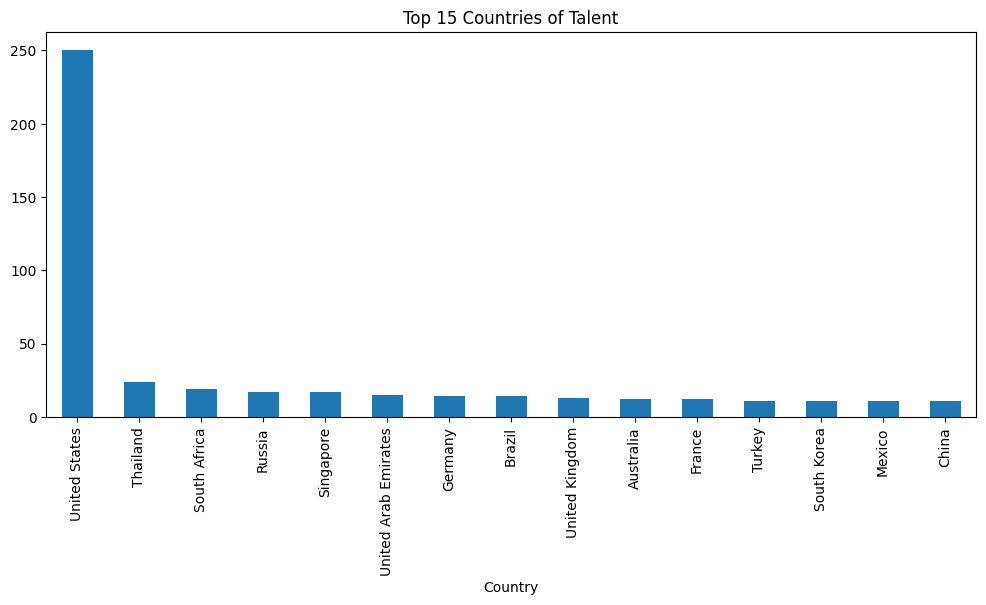

In [5]:
#EDA & Visualization
# Top 15 countries
plt.figure(figsize=(12,5))
df['Country'].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Countries of Talent")
plt.show()

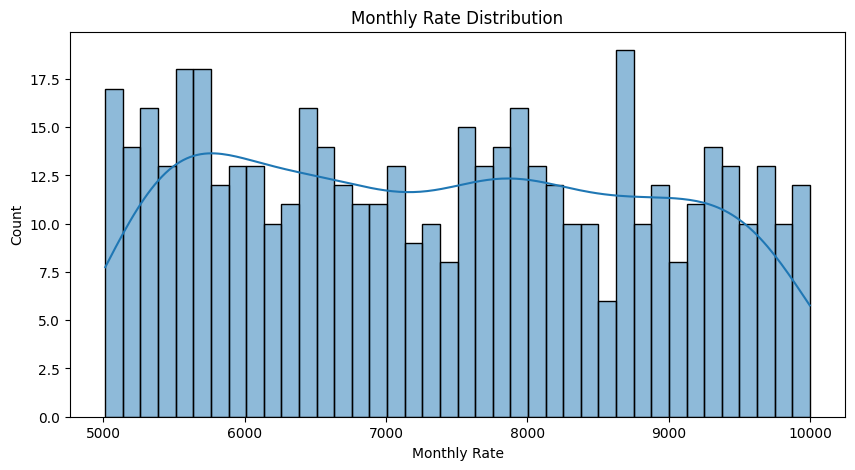

In [6]:
# Monthly Rate Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Monthly Rate'], bins=40, kde=True)
plt.title("Monthly Rate Distribution")
plt.show()

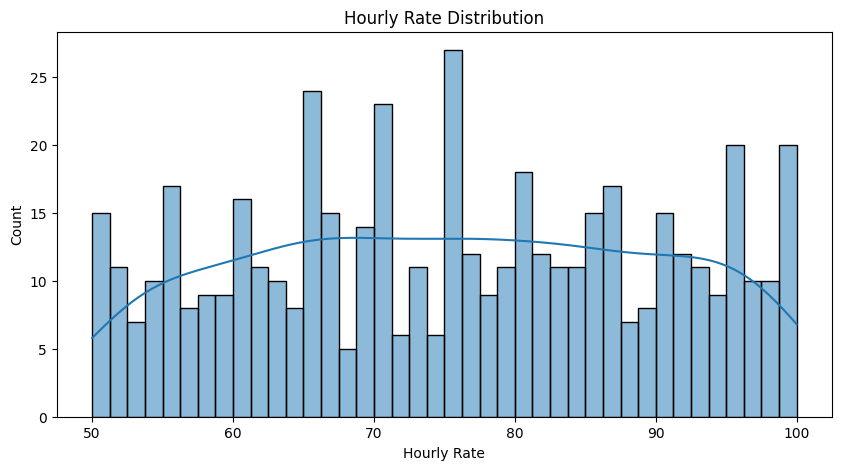

In [7]:
# Hourly Rate Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Hourly Rate'], bins=40, kde=True)
plt.title("Hourly Rate Distribution")
plt.show()

In [8]:
# Skills Frequency (Top 20)
from collections import Counter

all_skills = []
df['Skills'].dropna().apply(lambda x: all_skills.extend([s.strip().lower() for s in x.split(',')]))
skill_counts = Counter(all_skills)


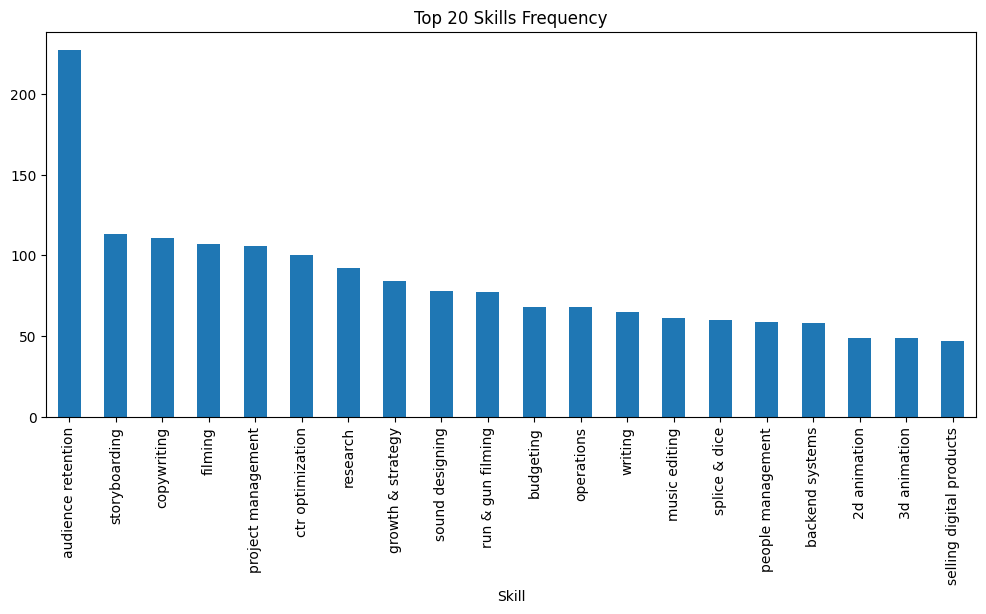

In [9]:
pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Count']).plot(
    kind='bar', x='Skill', y='Count', figsize=(12,5), legend=False)
plt.title("Top 20 Skills Frequency")
plt.show()

In [10]:
#Step 3: Normalize Skills
skill_map = {
    "premiere pro": "adobe premiere pro",
    "pr": "adobe premiere pro",
    "ps": "adobe photoshop",
    "story boarding": "storyboarding",
    "tik tok": "tiktok",
    "rough cut": "rough cut & sequencing",
    "sound design": "sound designing"
}

In [11]:
def normalize_skills(skill_str):
    if pd.isnull(skill_str): return []
    skills = [s.strip().lower() for s in skill_str.split(',')]
    normalized = [skill_map.get(s, s) for s in skills]
    return list(set(normalized))
df['CleanedSkills'] = df['Skills'].apply(normalize_skills)

In [12]:
#Step 4: Clean Rate Columns
# Already numeric, just fill NAs if any
df['Monthly Rate'] = df['Monthly Rate'].fillna(df['Monthly Rate'].median())
df['Hourly Rate'] = df['Hourly Rate'].fillna(df['Hourly Rate'].median())

In [13]:
#Step 5: Extract Key Tokens from Profile Description
def extract_tokens(bio):
    if pd.isnull(bio): return []
    bio = bio.lower()
    tokens = []
    if "animal" in bio: tokens.append("animals")
    if "education" in bio or "teaching" in bio: tokens.append("education")
    if "food" in bio or "cooking" in bio: tokens.append("food")
    if "fashion" in bio: tokens.append("fashion")
    if "travel" in bio: tokens.append("travel")
    if "lifestyle" in bio: tokens.append("lifestyle")
    return tokens
df['BioTokens'] = df['Profile Description'].apply(extract_tokens)

In [14]:
#✅ Step 6: Boolean Features for Key Skills
df['has_premiere'] = df['CleanedSkills'].apply(lambda skills: 1 if "adobe premiere pro" in skills else 0)
df['has_tiktok'] = df['CleanedSkills'].apply(lambda skills: 1 if "tiktok" in skills else 0)
df['has_storyboarding'] = df['CleanedSkills'].apply(lambda skills: 1 if "storyboarding" in skills else 0)
df['has_sound_design'] = df['CleanedSkills'].apply(lambda skills: 1 if "sound designing" in skills else 0)

# ✅ Preview 
df[['First Name','Last Name','CleanedSkills','BioTokens','has_premiere','has_tiktok']].head()

,First Name,Last Name,CleanedSkills,BioTokens,has_premiere,has_tiktok
0,Sarah,Moore,"[sound designing, investment planning, portfol...",[],0,0
1,Michael,Miller,"[contract review & redline, advising, audience...",[],0,0
2,William,Taylor,"[storyboarding, copywriting, sourcing stock fo...",[],0,0
3,Mary,Taylor,[selling digital products],[],0,0
4,William,Lopez,"[employment contracts, payroll & paystubs, sal...",[travel],0,0


In [15]:
%pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install -U sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [17]:
# 4: Text embeddings & semantic features -> imports
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import math
import json

# Utility: safe lower + strip
def clean_text(x):
    if pd.isnull(x): return ""
    return str(x).lower().strip()

# Utility: join lists/strings into a single text for embedding
def join_for_embedding(*parts, sep=" | "):
    parts = [clean_text(p) for p in parts if p and str(p).strip() != ""]
    return sep.join(parts)

c:\Users\HP\anaconda3\envs\py3_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# Create combined textual fields we will embed
# - bio_text: profile description + bio tokens
# - skill_text: cleaned skills + software + job types + content verticals
# - creators_text: past creators list

df['bio_text'] = df['Profile Description'].fillna('').astype(str)
# If you have BioTokens as list, join them; else just rely on profile description:
if 'BioTokens' in df.columns:
    df['bio_text'] = df['bio_text'] + " | " + df['BioTokens'].fillna('').astype(str)

# Skill text: use CleanedSkills if available; else use Skills raw
def list_to_text(x):
    if x is None or (isinstance(x, float) and pd.isna(x)):
        return ""
    if isinstance(x, (list, tuple, set)):
        return ", ".join(map(str, x))
    if isinstance(x, np.ndarray):
        return ", ".join(map(str, x.tolist()))
    return str(x)

if 'CleanedSkills' in df.columns:
    df['skill_text'] = df['CleanedSkills'].apply(list_to_text)
else:
    df['skill_text'] = df['Skills'].fillna('').astype(str)

# Add software and job types to skill_text to give context
for col in ['Software','Job Types','Content Verticals','Creative Styles','Platforms']:
    if col in df.columns:
        df['skill_text'] = df['skill_text'].str.cat(df[col].fillna('').astype(str), sep=' | ')

# Past creators
df['creators_text'] = df['Past Creators'].fillna('').astype(str)

In [19]:
# Load sentence-transformers model (fast and reasonably good)
EMBED_MODEL_NAME = "sentence-transformers/all-MiniLM-L6-v2"
model = SentenceTransformer(EMBED_MODEL_NAME)

# Create embeddings for each field (batch encode for speed)
# NOTE: large models can take memory; all-MiniLM is small enough for local use.
bio_texts = df['bio_text'].tolist()
skill_texts = df['skill_text'].tolist()
creators_texts = df['creators_text'].tolist()

print("Generating bio embeddings...")
bio_emb = model.encode(bio_texts, show_progress_bar=True, convert_to_numpy=True)

print("Generating skill embeddings...")
skill_emb = model.encode(skill_texts, show_progress_bar=True, convert_to_numpy=True)

print("Generating creators embeddings...")
creators_emb = model.encode(creators_texts, show_progress_bar=True, convert_to_numpy=True)

# Optional: normalize each embedding matrix (helps with cosine sim)
bio_emb = normalize(bio_emb)
skill_emb = normalize(skill_emb)
creators_emb = normalize(creators_emb)

# Save arrays to dataframe for convenience
df['bio_emb'] = list(bio_emb)
df['skill_emb'] = list(skill_emb)
df['creators_emb'] = list(creators_emb)

Generating bio embeddings...


Batches: 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]


Generating skill embeddings...


Batches: 100%|██████████| 16/16 [00:06<00:00,  2.66it/s]


Generating creators embeddings...


Batches: 100%|██████████| 16/16 [00:01<00:00,  8.21it/s]


In [20]:
# Weights to combine embeddings into one candidate vector
W_SKILL = 0.6
W_BIO = 0.3
W_CREATORS = 0.1

# Create candidate vectors
def combine_embeddings(skill_v, bio_v, creators_v, w_skill=W_SKILL, w_bio=W_BIO, w_creators=W_CREATORS):
    # All vectors should already be normalized; weight and re-normalize
    combined = w_skill * skill_v + w_bio * bio_v + w_creators * creators_v
    # handle zero-vector
    if np.linalg.norm(combined) == 0:
        return combined
    return combined / np.linalg.norm(combined)

candidate_vectors = np.vstack([
    combine_embeddings(skill_emb[i], bio_emb[i], creators_emb[i])
    for i in range(len(df))
])

# store for quick access
df['cand_vec'] = list(candidate_vectors)
print("Candidate vectors shape:", candidate_vectors.shape)

Candidate vectors shape: (500, 384)


In [21]:
# Define job postings (copy exactly from assignment)
job_posts = {
    "job_1": {
        "id": "UCi2qHfRMVEI_yHH90gZBevQ",
        "title": "Video Editor",
        "skills": ["adobe premiere pro", "splice & dice", "rough cut & sequencing", "2d animation"],
        "bio_keywords": ["entertainment", "lifestyle", "vlogs"],
        "location_pref": "asia",
        "budget_monthly": 2500
    },
    "job_2": {
        "id": "imjennim",
        "title": "Producer/Video Editor",
        "skills": ["storyboarding", "sound designing", "rough cut & sequencing", "filming", "tiktok"],
        "bio_keywords": ["entertainment", "education", "food & cooking"],
        "location_pref": ["new york","us_remote"],
        "budget_hourly": [100,150],
        "pref_gender": "female"   # soft preference
    },
    "job_3": {
        "id": "aliabdaal",
        "title": "Chief Operating Officer",
        "skills": ["strategy", "business operations", "development"],
        "bio_keywords": ["productivity","education","high energy","passion for education"],
        "location_pref": "any",
        "budget_unlimited": True
    }
}

# Helper: create textual query from job posting
def job_to_text(job):
    parts = []
    parts.append(job['title'])
    parts.append(", ".join(job.get('skills', [])))
    parts.append(", ".join(job.get('bio_keywords', [])))
    return " | ".join([p for p in parts if p])

# Create job emb
job_vectors = {}
for k, job in job_posts.items():
    text_skill = job_to_text(job)
    skill_v = model.encode(text_skill, convert_to_numpy=True)
    # For bio portion, reuse same text but could use different prompt — keep simple
    bio_v = model.encode(" ".join(job.get('bio_keywords', [])), convert_to_numpy=True)
    creators_v = np.zeros_like(skill_v)  # no creators context for jobs
    # Normalize and combine same weights as candidates
    skill_v = skill_v / np.linalg.norm(skill_v)
    bio_v = bio_v / np.linalg.norm(bio_v) if np.linalg.norm(bio_v) != 0 else bio_v
    job_vec = combine_embeddings(skill_v, bio_v, creators_v)
    job_vectors[k] = job_vec

print("Job vectors created:", list(job_vectors.keys()))

Job vectors created: ['job_1', 'job_2', 'job_3']


In [22]:
# Scoring weights (tweakable)
WEIGHT_SKILL_SIM = 0.50
WEIGHT_BIO_SIM = 0.25
WEIGHT_RATE_FIT = 0.15
WEIGHT_POPULARITY = 0.05
WEIGHT_PREF_BOOST = 0.05

# Helper: cosine sim
def cos_sim(a, b):
    if np.linalg.norm(a) == 0 or np.linalg.norm(b) == 0:
        return 0.0
    return float(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

# Rate fit functions (job may specify monthly or hourly)
def rate_score(candidate_row, job):
    # Returns a 0-1 rate-fit score
    # For job_1: monthly budget -> candidate Monthly Rate should be <= budget ideally
    if job.get('budget_monthly') is not None:
        pref = job['budget_monthly']
        cand = candidate_row.get('Monthly Rate', np.nan)
        if np.isnan(cand): return 0.5
        # If candidate rate <= budget -> 1. If above, decay exponentially
        if cand <= pref:
            return 1.0
        else:
            # penalize proportionally
            ratio = pref / cand
            return max(0.0, min(1.0, ratio))
    if job.get('budget_hourly') is not None:
        low, high = job['budget_hourly']
        cand = candidate_row.get('Hourly Rate', np.nan)
        if np.isnan(cand): return 0.5
        # prefer if within range -> 1. outside -> decayed
        if low <= cand <= high:
            return 1.0
        else:
            # distance from nearest bound
            diff = min(abs(cand - low), abs(cand - high))
            denom = max(low, high)
            return max(0.0, 1 - (diff / denom))
    # unlimited budget
    if job.get('budget_unlimited'):
        return 1.0
    return 0.5

# Hard filters function
def passes_hard_filters(candidate_row, job):
    # Location filter examples:
    job_loc = job.get('location_pref', 'any')
    cand_city = clean_text(candidate_row.get('City',''))
    cand_country = clean_text(candidate_row.get('Country',''))
    cand_location = f"{cand_city}, {cand_country}".strip().lower()
    # For job_1: prefer asia but open; so don't hard filter except for strict jobs
    if isinstance(job_loc, list):
        # job_2 wants NY or US remote: require US-based or remote flag (no remote field available)
        # We'll check country == USA or city contains 'new york'
        if 'new york' in " ".join([cand_city, cand_country]):
            return True
        if 'us' in cand_country or 'united states' in cand_country:
            return True
        # otherwise, exclude (strict location)
        return False
    elif job_loc == "new york":
        return ('new york' in cand_city) or ('new york' in cand_country) or ('united states' in cand_country)
    elif job_loc == "asia":
        # prefer asia but not hard filter: return True (we'll use boost in scoring)
        return True
    return True

# Preference boost example function
def preference_boost(candidate_row, job):
    boost = 0.0
    if job.get('pref_gender') is not None:
        if clean_text(candidate_row.get('Gender','')) == clean_text(job['pref_gender']):
            boost += 1.0  # raw boost; will be scaled
    # location soft boost if Asia preferred and candidate country in asia list
    if job.get('location_pref') == 'asia':
        asia_countries = ["india","indonesia","philippines","pakistan","bangladesh","sri lanka","thailand","vietnam","malaysia","china","japan","south korea","nepal"]
        if any(c in clean_text(candidate_row.get('Country','')) for c in asia_countries):
            boost += 0.5
    return boost  # raw boost

In [23]:
def score_candidate_for_job(idx, job_key):
    job = job_posts[job_key]
    cand_row = df.iloc[idx]
    # Hard filter check
    if not passes_hard_filters(cand_row, job):
        return None  # excluded

    # Similarities
    cand_skill_v = np.array(cand_row['skill_emb'])
    cand_bio_v = np.array(cand_row['bio_emb'])
    # job vector uses combined; but we can compute both skill and bio sim separately
    job_skill_text = ", ".join(job.get('skills', []))
    job_skill_v = model.encode(job_skill_text, convert_to_numpy=True)
    if np.linalg.norm(job_skill_v) != 0:
        job_skill_v = job_skill_v / np.linalg.norm(job_skill_v)
    job_bio_v = model.encode(" ".join(job.get('bio_keywords', [])), convert_to_numpy=True)
    if np.linalg.norm(job_bio_v) != 0:
        job_bio_v = job_bio_v / np.linalg.norm(job_bio_v)

    skill_sim = cos_sim(cand_skill_v, job_skill_v)
    bio_sim = cos_sim(cand_bio_v, job_bio_v)

    # Rate fit
    rscore = rate_score(cand_row, job)

    # Popularity (normalize # of views)
    max_views = df['# of Views by Creators'].max() if '# of Views by Creators' in df.columns else 1
    views = cand_row.get('# of Views by Creators', 0)
    pop_score = min(1.0, views / max_views)

    # Preference boost scaled to 0-1
    pref_raw = preference_boost(cand_row, job)
    # scale: highest possible raw ~1.5 => map to 0..1
    pref_score = min(1.0, pref_raw / 1.5)

    # Combine using weights
    final_raw = (WEIGHT_SKILL_SIM * skill_sim +
                 WEIGHT_BIO_SIM * bio_sim +
                 WEIGHT_RATE_FIT * rscore +
                 WEIGHT_POPULARITY * pop_score +
                 WEIGHT_PREF_BOOST * pref_score)

    # scale to 0-100
    final_score = float(final_raw * 100)

    # Explanation: top contributing factors
    explanation_parts = []
    explanation_parts.append(f"Skill sim: {skill_sim:.3f}")
    explanation_parts.append(f"Bio sim: {bio_sim:.3f}")
    explanation_parts.append(f"Rate fit: {rscore:.3f}")
    explanation_parts.append(f"Popularity: {pop_score:.3f}")
    if pref_score > 0:
        explanation_parts.append(f"Pref boost: {pref_score:.3f}")

    explanation = "; ".join(explanation_parts)

    return {
        "idx": idx,
        "name": f"{cand_row['First Name']} {cand_row['Last Name']}",
        "city": cand_row.get('City',''),
        "country": cand_row.get('Country',''),
        "monthly_rate": cand_row.get('Monthly Rate', np.nan),
        "hourly_rate": cand_row.get('Hourly Rate', np.nan),
        "final_score": final_score,
        "breakdown": {
            "skill_sim": skill_sim,
            "bio_sim": bio_sim,
            "rate_fit": rscore,
            "popularity": pop_score,
            "preference": pref_score
        },
        "explanation": explanation
    }

# Rank all candidates for a job and return top-k
def get_top_k_for_job(job_key, k=10):
    scored = []
    for i in range(len(df)):
        res = score_candidate_for_job(i, job_key)
        if res is None:
            continue
        scored.append(res)
    # convert to dataframe and sort
    scored_sorted = sorted(scored, key=lambda x: x['final_score'], reverse=True)
    return scored_sorted[:k]

In [24]:
top10_by_job = {}
for job_key in job_posts.keys():
    print(f"\n=== Top 10 for {job_key} ===")
    topk = get_top_k_for_job(job_key, k=10)
    top10_by_job[job_key] = topk
    for rank, c in enumerate(topk, start=1):
        print(f"{rank}. {c['name']} — score: {c['final_score']:.2f} — {c['city']}, {c['country']}")
        print("   Breakdown:", json.dumps(c['breakdown'], indent=None))
        print("   Explain:", c['explanation'])


=== Top 10 for job_1 ===
1. Jennifer Jackson — score: 54.34 — Jacksonville, United States
   Breakdown: {"skill_sim": 0.6672859191894531, "bio_sim": 0.5076962113380432, "rate_fit": 0.45061283345349673, "popularity": 0.305, "preference": 0.0}
   Explain: Skill sim: 0.667; Bio sim: 0.508; Rate fit: 0.451; Popularity: 0.305
2. Sarah Miller — score: 53.30 — Singapore, Brazil
   Breakdown: {"skill_sim": 0.6645396947860718, "bio_sim": 0.34889835119247437, "rate_fit": 0.4881859011911736, "popularity": 0.805, "preference": 0.0}
   Explain: Skill sim: 0.665; Bio sim: 0.349; Rate fit: 0.488; Popularity: 0.805
3. Jessica Brown — score: 52.14 — Columbus, United States
   Breakdown: {"skill_sim": 0.68354332447052, "bio_sim": 0.37508919835090637, "rate_fit": 0.39050296782255545, "popularity": 0.545, "preference": 0.0}
   Explain: Skill sim: 0.684; Bio sim: 0.375; Rate fit: 0.391; Popularity: 0.545
4. Charles Martin — score: 50.92 — Bangkok, India
   Breakdown: {"skill_sim": 0.6168273091316223, "bio